#  Basic usage tutorial 

## Installation

For installatio, please refre to https://pyfragdocument.readthedocs.io/en/latest/install.html   

## Job Prepration

In [2]:
!source $PYFRAGHOME/.pyfragrc

Before this command, the PYFRAGHOME path has to be set correctly!

In [3]:
%mkdir pyfrag

In [4]:
%cp $PYFRAGHOME/example/job.in ./pyfrag

In [5]:
%cd pyfrag

/Users/xiaobo/Dropbox/jupyter-notebook/pyfrag


In [6]:
%ls

job.in


**Noted** For each job a new directory and a new job name should be given. Don't put more than one jobs in one directory, othervise may cause clash.

Something like this will shown if previous steps is correct. Now we are ready to start PyFrag.
```bash
Xiaobos-MacBook-Air:pyfrag xiaobo$ ls
job.in
Xiaobos-MacBook-Air:pyfrag xiaobo$ 
```

## Input Explanation

In [7]:
%cat job.in

JOBSUB

#!/bin/bash
#SBATCH -J frag_1
#SBATCH -N 1
#SBATCH -t 50:00
#SBATCH --ntasks-per-node=24
#SBATCH --partition=short
#SBATCH --output=%job.stdout
#SBATCH --error=%job.stdout
export NSCM=24

JOBSUB END


ADF

basis
type TZ2P
core Small
end

xc
gga OPBE
end

relativistic SCALAR ZORA



scf
iterations 299
converge 0.00001
mixing 0.20
end

numericalquality verygood

charge 0 0
symmetry auto


ADF END


PyFrag

fragment  2
fragment  1 3 4 5 6
strain    0
strain   -554.09
bondlength 1 6  1.09

PyFrag END




Geometrycoor

R1: Fe-II(CO)4 + CH4
Pd       0.00000000       0.00000000       0.32205546



R2: CH4
C       0.00000000       0.00000000      -1.93543634
H      -0.96181082       0.00000000      -1.33610429
H       0.00000000      -0.90063254      -2.55201285
H       0.00000000       0.90063254      -2.55201285
H       0.96181082       0.00000000      -1.33610429




RC: Fe-II(CO)4 + CH4
C       0.00000000       0.00000000      -1.93543615
Pd       0.00000000       0.00000000       

Explanation of input option!

```python

''''
JOBSUB section is for the information passed to the remote host machine 
where the heavy computatonal job is done! It is written in the fashion of Slurm.
''''
JOBSUB

#!/bin/bash
#SBATCH -J frag_1
#SBATCH -N 1
#SBATCH -t 50:00
#SBATCH --ntasks-per-node=24
#SBATCH --partition=short
#SBATCH --output=%job.stdout
#SBATCH --error=%job.stdout
export NSCM=24

JOBSUB END

''''
Provide the parameters for a DFT calculation using ADF software.
''''
ADF

basis
type TZ2P
core Small
end

xc
gga OPBE
end

relativistic SCALAR ZORA

scf
iterations 299
converge 0.00001
mixing 0.20
end

numericalquality verygood

charge 0 0
symmetry auto


ADF END

''''
Provide the parameters for an activation strain analysis.
''''

PyFrag

fragment  2
fragment  1 3 4 5 6
strain    0
strain   -554.09
bondlength 1 6  1.09

PyFrag END


''''
Guseed geometry coordinate for reactent1, reactent2, reactent complex,
transition state and product.
''''

Geometrycoor

R1: Fe-II(CO)4 + CH4
Pd       0.00000000       0.00000000       0.32205546



R2: CH4
C       0.00000000       0.00000000      -1.93543634
H      -0.96181082       0.00000000      -1.33610429
H       0.00000000      -0.90063254      -2.55201285
H       0.00000000       0.90063254      -2.55201285
H       0.96181082       0.00000000      -1.33610429




RC: Fe-II(CO)4 + CH4
C       0.00000000       0.00000000      -1.93543615
Pd       0.00000000       0.00000000       0.322055
H      -0.96181082       0.00000000      -1.33610429
H       0.00000000      -0.90063254      -2.55201285
H       0.00000000       0.90063254      -2.55201285
H       0.96181082       0.00000000      -1.33610429



TS: Fe-II(CO)4 + CH4
C      -1.74196777      -2.22087997       0.00000000
Pd     -2.13750904      -0.23784341       0.00000000
H      -2.80956968      -2.49954731       0.00000000
H      -1.26528821      -2.62993236       0.8956767
H      -1.26528821      -2.62993236      -0.895676
H      -0.75509932      -0.88569836       0.00000000




P: Fe-II(CO)4 + CH4
C      -2.10134690      -2.41901732       0.1862099
Pd      -2.73145901      -0.57025833       0.419766
H      -3.88639130      -1.04648079      -0.43099501
H      -2.78392696      -3.12497645       0.66994616
H      -1.97386865      -2.66955518      -0.87144525
H      -1.12556673      -2.41201402       0.698583



Geometrycoor END
```

## What is QMflows?
QMflows is a python library that enables executing complicated workflows of interdependent quantum chemical (QM) calculations in python. It aims at providing a common interface to multiple QM packages, enabling easy and systematic generation of the calculation inputs, as well as facilitating automatic analysis of the results. Furthermore it is build on top of the powerful Noodles framework for executing the calculations in parallel where possible.

## The basics: calling packages
Currently **QMFLOWS** offers an interface with the following simulation software:

* **SCM (ADF and DTFB)**
* **CP2K**
* **ORCA**
* **GAMESS-US**
* **DIRAC**

### Note:
>Please make sure that the packages you want to use in QMflows are installed and active; in most supercomputer the simulation package are available using a command like (consult your system administrator):

>`load module superAwesomeQuantumPackage/3.1421`

> Also some simulation packages required that you configure a *scratch* folder. For instance *Orca* requires a *SCR* folder to be defnied while *ADF* called it *SCM_TMPDIR*.


With ``qmflows`` you can write a python script that simply calls one of the package objects 
`adf, dftb, cp2k, orca, gamess or dirac`.
As arguments to the call, you need to provide a ``settings`` objects defining the input of a calculation, a molecular geometry, and, optionally, a job name that enables you to find back the "raw" data of the calculation later on.

Let's see how this works:

First we define a molecule, for example by reading one from an xyz file:

Then we can perform geometry optimization on the molecule by a call to the dftb package object:

As you can see, "job" is a so-called "promised object". It means it first needs to be "run" by the Noodles scheduler to return a normal python object.

We can easily retrieve the calculated properties from the DFTB calculation such as the dipole or the optimized geometry for use in subsequent calculations.

## Settings and templates
In the above example ``templates.geometry`` was actually a predefined Settings object.
You can define and manipulate Settings in a completely flexible manner as will be explained in this section. To facilitate combining different packages in one script, QMflows defines a set of commonly used generic keywords, which can be combined with package specific keywords, to provide maximum flexibility.

This code snippet illustrates that the ``Settings`` can be specified in two ways, using generic or specific keywords. Generic keywords represent input properties that are present in most simulation packages like a *basis set* while *specific* keywords allow the user to apply specific keywords for a package that are not in a generic dictionary.

### Expert info:
>*Settings* are a subclass of python [dictionaries](https://docs.python.org/3.5/tutorial/datastructures.html#dictionaries) to represent herarchical structures, like


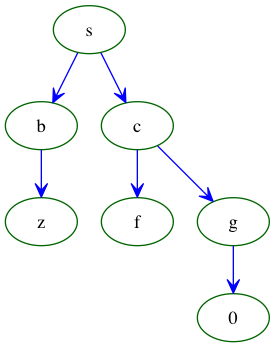

In [4]:
from IPython.display import Image
Image(filename="files/simpleTree.png")

>In QMflows/PLAMS multiple settings objects can be combined using the ``overlay`` function.

The *overlay* method merged the template containing default settings for geometry optimizations with different packages with the arguments provided by the user 
